<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2024_BAN7040/blob/main/BAN7040_FinalStarter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Starter Code...

Yes there is a lot of code here, but don't rely just on this notebook there are several gotcha's with this data and you can build a good model if you find them!

In [168]:
import warnings
warnings.filterwarnings('ignore')

# -- pandas and numpy --
import numpy as np
import pandas as pd

# -- plotting --
import matplotlib.pyplot as plt
import seaborn as sns

# -- sklearn stuff --

# -- sklearn modules
from sklearn.model_selection import train_test_split   #- partition train/test split
from sklearn.ensemble import RandomForestClassifier    #- random forest classifier
from sklearn.ensemble import GradientBoostingClassifier #- gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier         #- decision tree classifier

# -- we need these to make our pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV # NOTE...
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# -- we need these to evaluate our models
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# -- need this to render charts in notebook --
%matplotlib inline

## Load Data

In [169]:
loan = pd.read_csv('/content/car_loan.csv')
loan.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


## Clean up columns

In [170]:
loan.columns = ( loan.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('.', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)
print(loan.columns)

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'state_id', 'employee_code_id', 'mobileno_avl_flag',
       'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag',
       'passport_flag', 'perform_cns_score', 'perform_cns_score_description',
       'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
       'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
       'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'average_acct_age',
       'credit_history_length', 'no_of_inquiries', 'loan_default'],
      dtype='object')


In [171]:
# Get rid of IDs
# Identify columns containing '_id'
id_columns = [col for col in loan.columns if '_id' in col]
print(f"Columns containing '_id': {id_columns}")

# Create a list of columns to keep (excluding those with '_id')
columns_to_keep = [col for col in loan.columns if '_id' not in col]
print(f"Columns to keep: {columns_to_keep}")

# Create a new DataFrame with only the columns to keep
loan = loan[columns_to_keep]
loan.head()

Columns containing '_id': ['branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id', 'employee_code_id']
Columns to keep: ['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'date_of_birth', 'employment_type', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score', 'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age', 'credit_history_length', 'no_of_inquiries', 'loan_default']


,uniqueid,disbursed_amount,asset_cost,ltv,date_of_birth,employment_type,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,420825,50578,58400,89.55,1/1/1984,Salaried,1,1,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,31-07-85,Self employed,1,1,0,0,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,24-08-85,Self employed,1,1,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,30-12-93,Self employed,1,1,0,0,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,9/12/1977,Self employed,1,1,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


## Clean up Data

for example:

- average_acct_age
- credit_history_length
- date_of_birth



In [172]:
loan['avg_acct_age'] = loan['average_acct_age'].str.extract(r'(\d+)').astype(float) + loan['average_acct_age'].str.extract(r'(\d+)m').fillna(0).astype(float) / 12
loan['avg_acct_age'].describe()

,avg_acct_age
count,233154.000000
mean,0.742980
std,1.258868
min,0.000000
25%,0.000000
50%,0.000000
75%,1.083333
max,30.750000


In [173]:
loan['credit_hist_leng'] = loan['credit_history_length'].str.extract(r'(\d+)').astype(float) + loan['credit_history_length'].str.extract(r'(\d+)m').fillna(0).astype(float) / 12
loan['credit_hist_leng'].describe()

,credit_hist_leng
count,233154.000000
mean,1.354367
std,2.381771
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,39.000000


In [174]:
# Function to convert date strings based on format
def convert_dates(date_series):
    # Convert dates assuming format DD/MM/YYYY
    converted_dates_1 = pd.to_datetime(date_series, format='%d/%m/%Y', errors='coerce')

    # Convert dates assuming format DD-MM-YY (European style)
    converted_dates_2 = pd.to_datetime(date_series, format='%d-%m-%y', errors='coerce')

    # Combine both conversions, filling NaTs from the first with values from the second
    final_dates = converted_dates_1.fillna(converted_dates_2)

    return final_dates


# Apply the function to the 'date_of_birth' column
loan['date_of_birth'] = convert_dates(loan['date_of_birth'])


loan['birth_year'] = loan['date_of_birth'].dt.year

# Display the updated DataFrame
loan.head()

,uniqueid,disbursed_amount,asset_cost,ltv,date_of_birth,employment_type,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,...,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,avg_acct_age,credit_hist_leng,birth_year
0,420825,50578,58400,89.55,1984-01-01,Salaried,1,1,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000,1984
1,537409,47145,65550,73.23,1985-07-31,Self employed,1,1,0,0,...,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1.916667,1.916667,1985
2,417566,53278,61360,89.63,1985-08-24,Self employed,1,1,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000,1985
3,624493,57513,66113,88.48,1993-12-30,Self employed,1,1,0,0,...,0,0,0,0yrs 8mon,1yrs 3mon,1,1,0.666667,1.250000,1993
4,539055,52378,60300,88.39,1977-12-09,Self employed,1,1,0,0,...,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0.000000,0.000000,1977


In [175]:
loan['customer_age'] = 2024 - loan['birth_year']
# deal with age < 0
loan['customer_age'] = np.where(loan['customer_age'] < 0, loan['customer_age'].median(), loan['customer_age'])
loan['customer_age'].describe()

,customer_age
count,233154.00000
mean,39.53134
std,9.23584
min,24.00000
25%,32.00000
50%,38.00000
75%,46.00000
max,70.00000


## Are their Nulls?

In [176]:
loan.isna().sum()

,0
uniqueid,0
disbursed_amount,0
asset_cost,0
ltv,0
date_of_birth,0
employment_type,7661
mobileno_avl_flag,0
aadhar_flag,0
pan_flag,0
voterid_flag,0


In [177]:
loan['employment_type'].fillna('Unknown', inplace=True)
loan['employment_type'].value_counts()

,count
employment_type,
Self employed,127635
Salaried,97858
Unknown,7661


## Exploratory Analysis

In [178]:
loan['loan_default'].value_counts()

,count
loan_default,
0,182543
1,50611


In [179]:
loan['loan_default'].value_counts(normalize=True)

,proportion
loan_default,
0,0.782929
1,0.217071


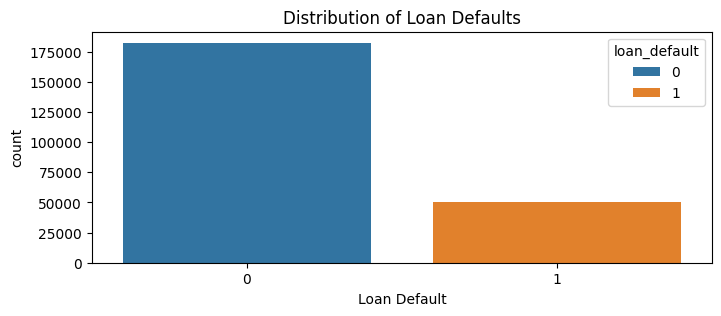

In [180]:
plt.figure(figsize=(8, 3))
sns.countplot(data=loan, x='loan_default', hue='loan_default')
plt.xlabel('Loan Default')
plt.title('Distribution of Loan Defaults')
plt.show()

## Describe

In [181]:
loan.groupby('loan_default').describe().T

loan_default                    0              1
uniqueid     count       182543.0        50611.0
             mean   534700.011186  540309.058525
             min         417428.0       417439.0
             25%         476510.0       477773.0
             50%         533986.0       544405.0
...                           ...            ...
customer_age 25%             32.0           31.0
             50%             38.0           37.0
             75%             46.0           45.0
             max             70.0           70.0
             std         9.236262       9.213958

[264 rows x 2 columns]

In [182]:
# Get rid of IDs
# Identify columns containing '_id'
id_columns = [col for col in loan.columns if '_id' in col]
print(f"Columns containing '_id': {id_columns}")

# Create a list of columns to keep (excluding those with '_id')
columns_to_keep = [col for col in loan.columns if '_id' not in col]
print(f"Columns to keep: {columns_to_keep}")

# Create a new DataFrame with only the columns to keep
loan = loan[columns_to_keep]
loan.head()

Columns containing '_id': []
Columns to keep: ['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'date_of_birth', 'employment_type', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score', 'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age', 'credit_history_length', 'no_of_inquiries', 'loan_default', 'avg_acct_age', 'credit_hist_leng', 'birth_year', 'customer_age']


,uniqueid,disbursed_amount,asset_cost,ltv,date_of_birth,employment_type,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,...,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,avg_acct_age,credit_hist_leng,birth_year,customer_age
0,420825,50578,58400,89.55,1984-01-01,Salaried,1,1,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000,1984,40.0
1,537409,47145,65550,73.23,1985-07-31,Self employed,1,1,0,0,...,0,1,1yrs 11mon,1yrs 11mon,0,1,1.916667,1.916667,1985,39.0
2,417566,53278,61360,89.63,1985-08-24,Self employed,1,1,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000,1985,39.0
3,624493,57513,66113,88.48,1993-12-30,Self employed,1,1,0,0,...,0,0,0yrs 8mon,1yrs 3mon,1,1,0.666667,1.250000,1993,31.0
4,539055,52378,60300,88.39,1977-12-09,Self employed,1,1,0,0,...,0,0,0yrs 0mon,0yrs 0mon,1,1,0.000000,0.000000,1977,47.0


## Explore

Number of unique values in 'customer_age': 47
Number of bins: 30


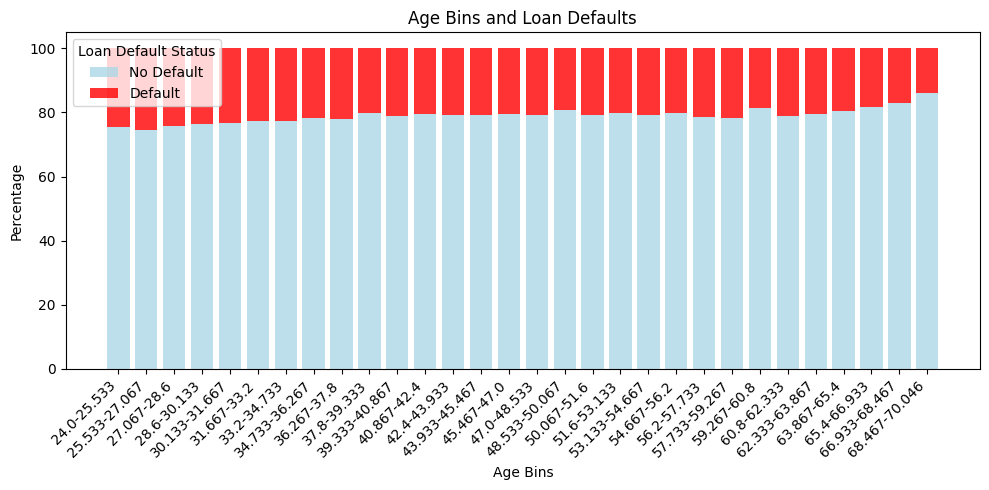

In [183]:
# Calculate the number of unique values
num_unique_values = loan['customer_age'].nunique()
print(f"Number of unique values in 'customer_age': {num_unique_values}")

# Decide on the number of bins
num_bins = min(num_unique_values, 30)
print(f"Number of bins: {num_bins}")

# Create bins using pd.cut for non-NaN values to determine bin edges
bins = pd.cut(loan['customer_age'].dropna(), bins=num_bins, right=False, duplicates='drop')

# Get the bin edges from the resulting pd.IntervalIndex
bin_edges = bins.cat.categories

# Create a new column with binned ages using the bin edges
loan['age_bins'] = pd.cut(loan['customer_age'], bins=bin_edges, right=False, include_lowest=True)

# Ensure the age_bins column is categorical
loan['age_bins'] = loan['age_bins'].astype('category')

# Calculate the percentage distribution of loan defaults in each age bin
crosstab_result = pd.crosstab(loan['age_bins'], loan['loan_default'], normalize='index') * 100

# Convert interval index to string labels for plotting
crosstab_result.index = crosstab_result.index.map(lambda x: f'{x.left}-{x.right}')

# Plot the stacked bar chart
plt.figure(figsize=(10, 5))
plt.bar(crosstab_result.index, crosstab_result[0], label='No Default', color='lightblue', alpha=0.8)
plt.bar(crosstab_result.index, crosstab_result[1], bottom=crosstab_result[0], label='Default', color='red', alpha=0.8)
plt.title('Age Bins and Loan Defaults')
plt.xlabel('Age Bins')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Default Status')
plt.tight_layout()
plt.show()

loan.drop(columns=['age_bins'], inplace=True)


Number of unique values in avg_acct_age: 192
Number of bins: 30


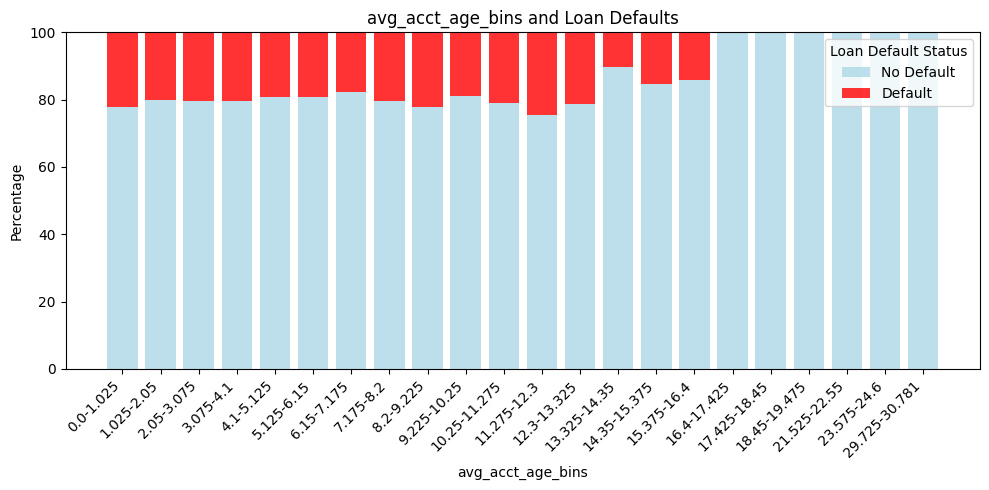

In [184]:
def profile_numeric(col):
  # Calculate the number of unique values
  num_unique_values = loan[col].nunique()
  print(f"Number of unique values in {col}: {num_unique_values}")

  # Decide on the number of bins
  num_bins = min(num_unique_values, 30)
  print(f"Number of bins: {num_bins}")

  # Create bins using pd.cut for non-NaN values to determine bin edges
  bins = pd.cut(loan[col].dropna(), bins=num_bins, right=False, duplicates='drop')

  # Get the bin edges from the resulting pd.IntervalIndex
  bin_edges = bins.cat.categories

  # Create a new column with binned ages using the bin edges
  loan[f'{col}_bins'] = pd.cut(loan[col], bins=bin_edges, right=False, include_lowest=True)

  # Ensure the age_bins column is categorical
  loan[f'{col}_bins'] = loan[f'{col}_bins'].astype('category')

  # Calculate the percentage distribution of loan defaults in each age bin
  crosstab_result = pd.crosstab(loan[f'{col}_bins'], loan['loan_default'], normalize='index') * 100

  # Convert interval index to string labels for plotting
  crosstab_result.index = crosstab_result.index.map(lambda x: f'{x.left}-{x.right}')

  # Plot the stacked bar chart
  plt.figure(figsize=(10, 5))
  plt.bar(crosstab_result.index, crosstab_result[0], label='No Default', color='lightblue', alpha=0.8)
  plt.bar(crosstab_result.index, crosstab_result[1], bottom=crosstab_result[0], label='Default', color='red', alpha=0.8)
  plt.title(f'{col}_bins and Loan Defaults')
  plt.xlabel(f'{col}_bins')
  plt.ylabel('Percentage')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Loan Default Status')
  plt.tight_layout()
  plt.show()
  loan.drop(columns=[f'{col}_bins'], inplace=True)

profile_numeric('avg_acct_age')

Number of unique values in uniqueid: 233154
Number of bins: 30


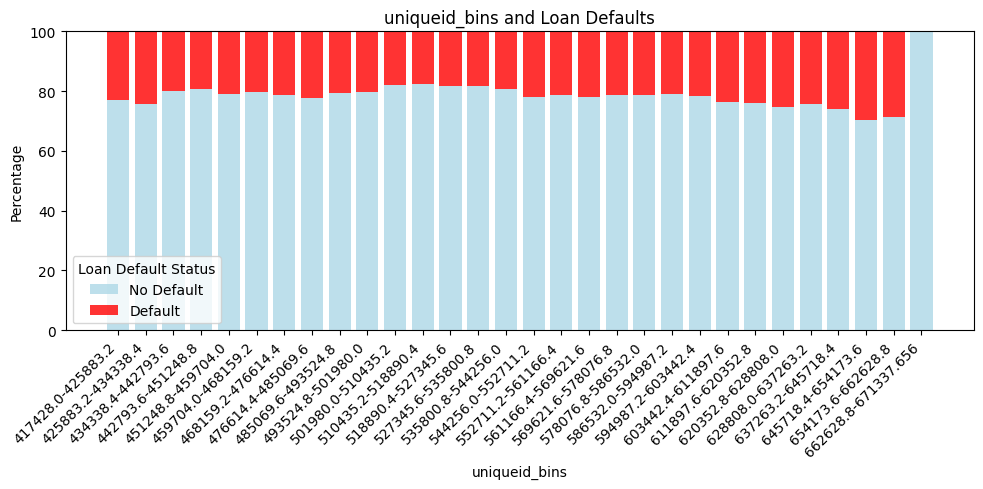

Number of unique values in disbursed_amount: 24565
Number of bins: 30


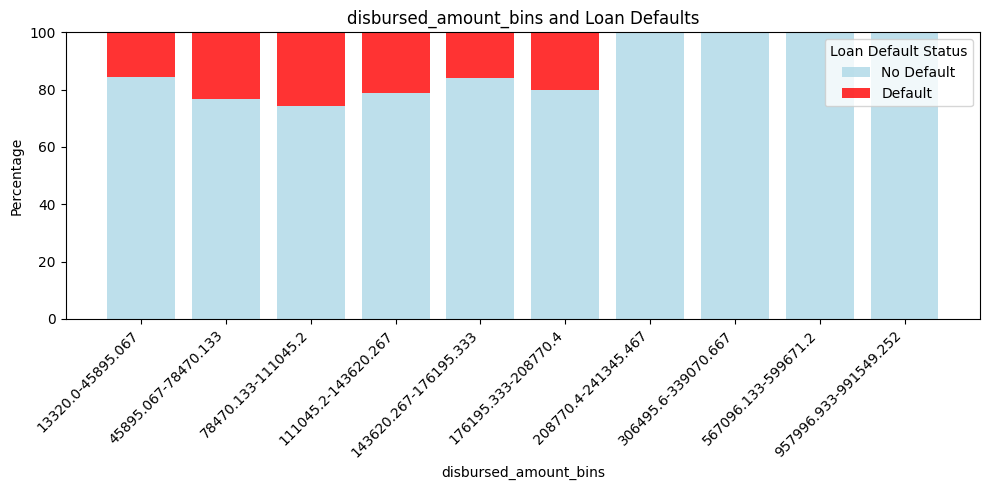

Number of unique values in asset_cost: 46252
Number of bins: 30


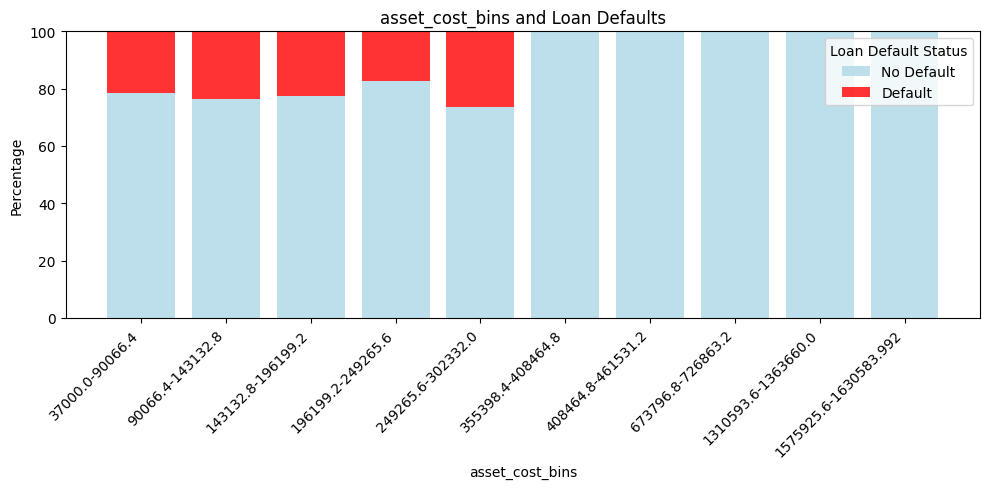

Number of unique values in ltv: 6579
Number of bins: 30


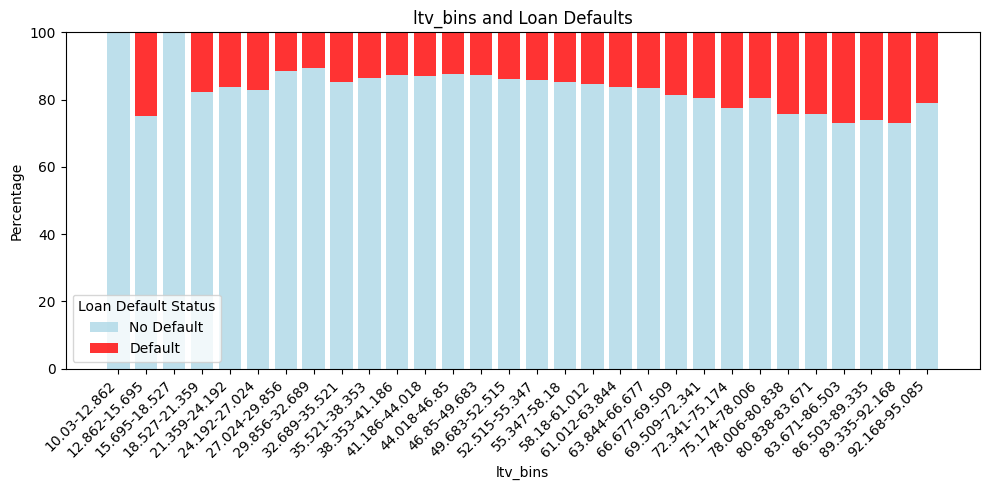

Number of unique values in mobileno_avl_flag: 1
Number of bins: 1


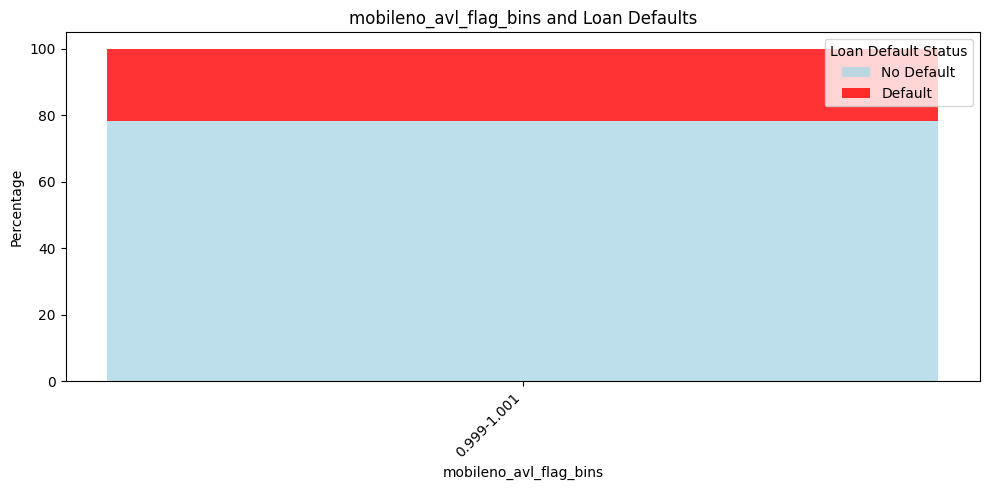

Number of unique values in aadhar_flag: 2
Number of bins: 2


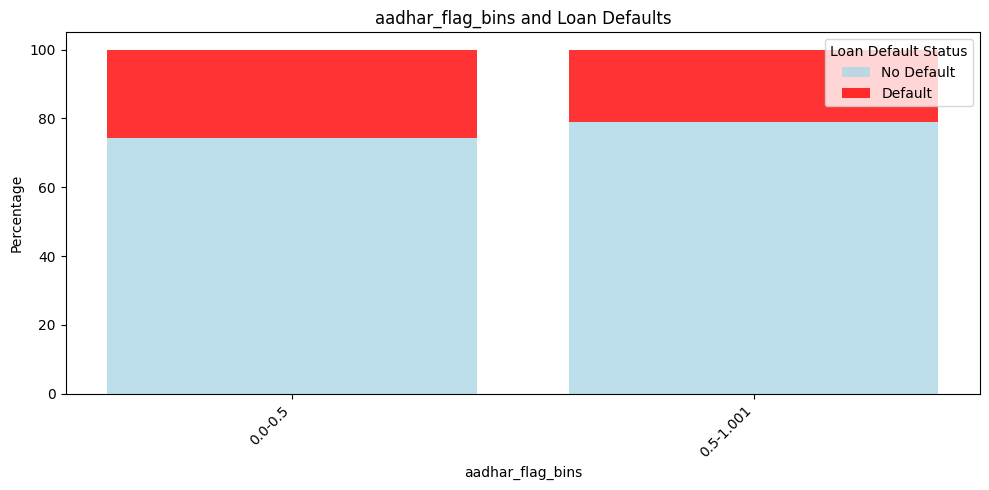

Number of unique values in pan_flag: 2
Number of bins: 2


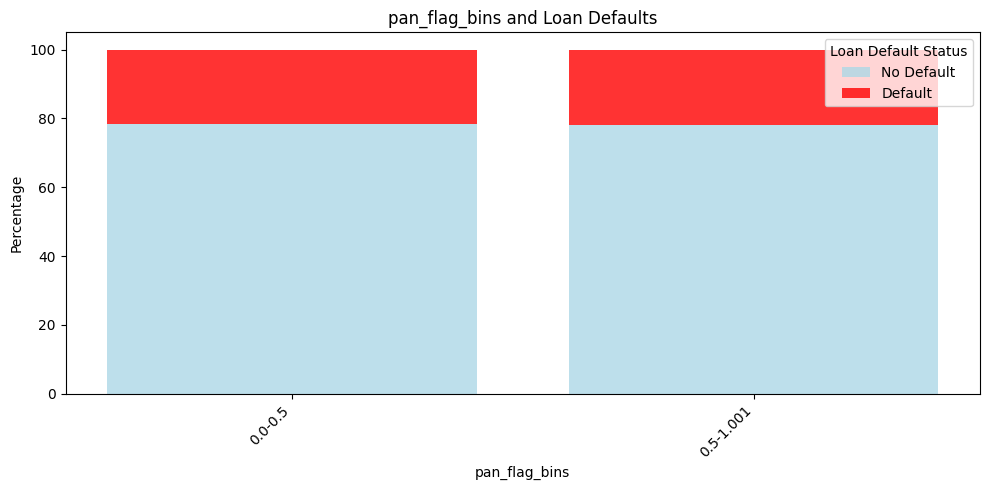

Number of unique values in voterid_flag: 2
Number of bins: 2


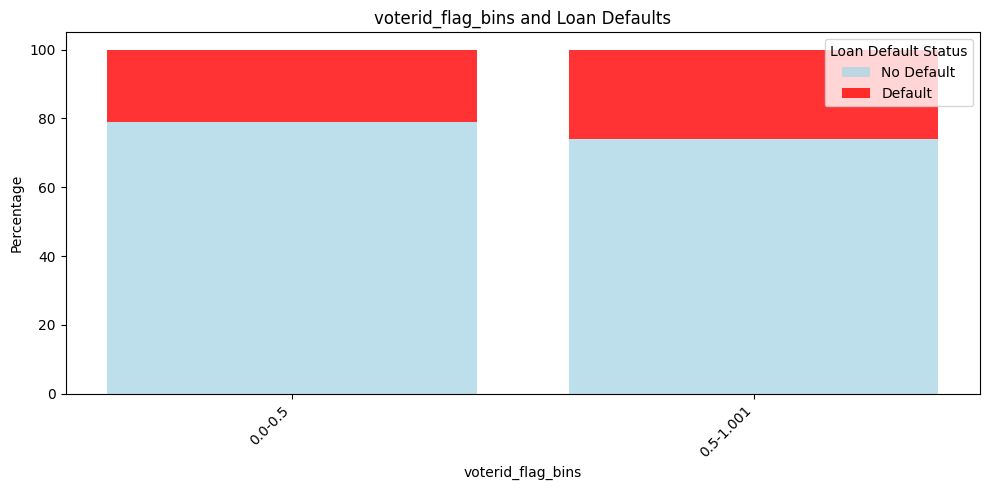

Number of unique values in driving_flag: 2
Number of bins: 2


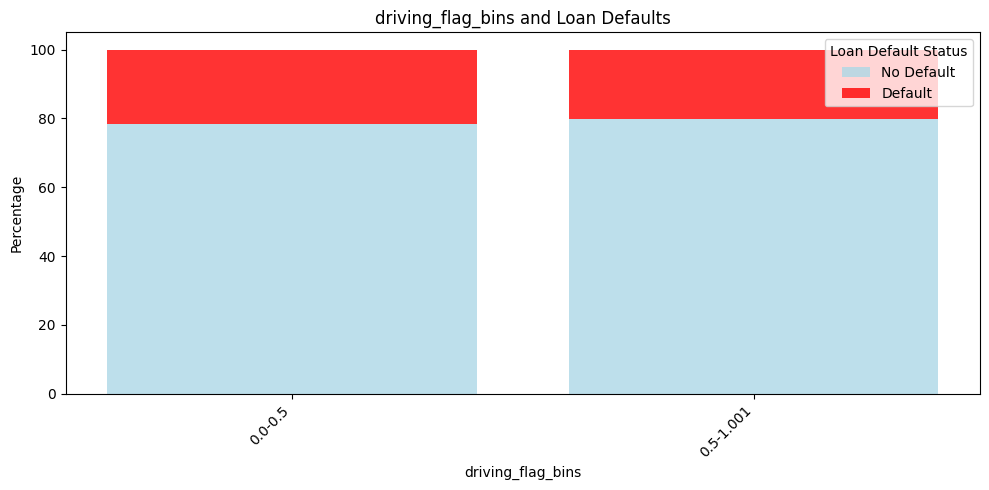

Number of unique values in passport_flag: 2
Number of bins: 2


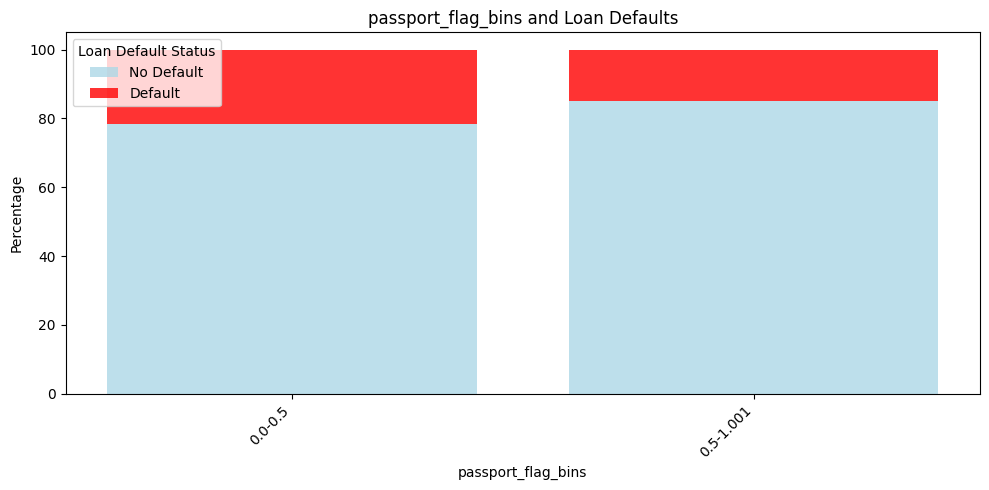

Number of unique values in perform_cns_score: 573
Number of bins: 30


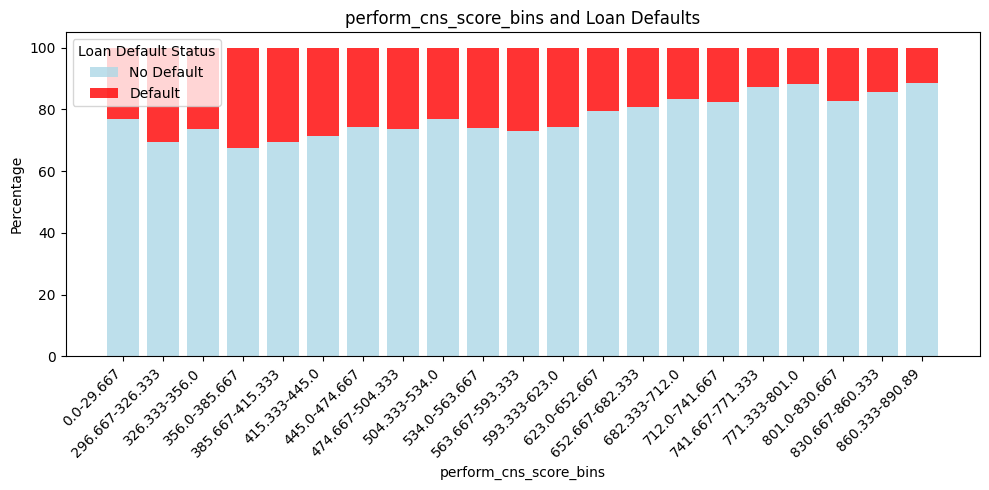

Number of unique values in pri_no_of_accts: 108
Number of bins: 30


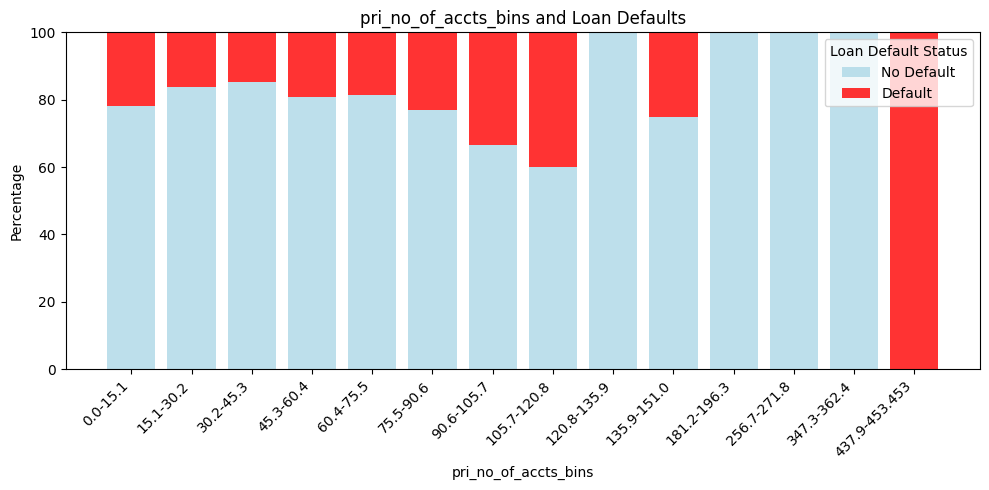

Number of unique values in pri_active_accts: 40
Number of bins: 30


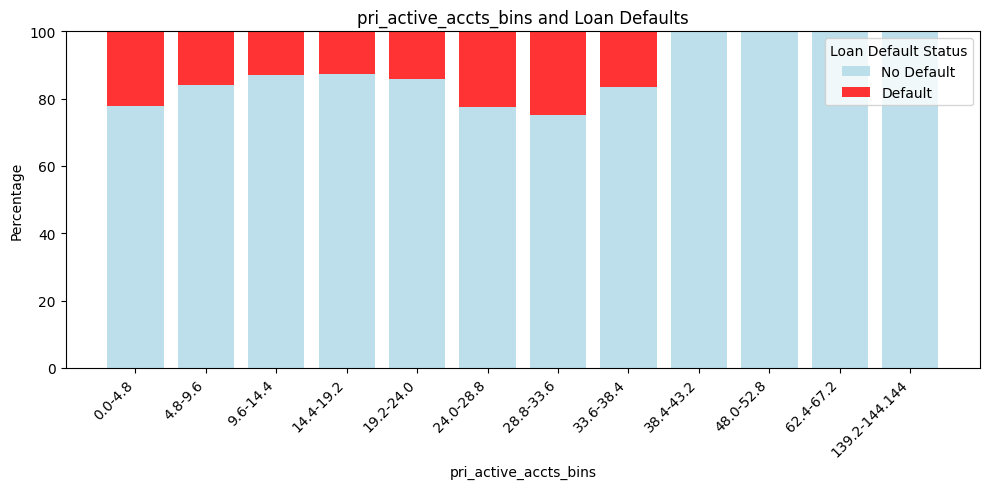

Number of unique values in pri_overdue_accts: 22
Number of bins: 22


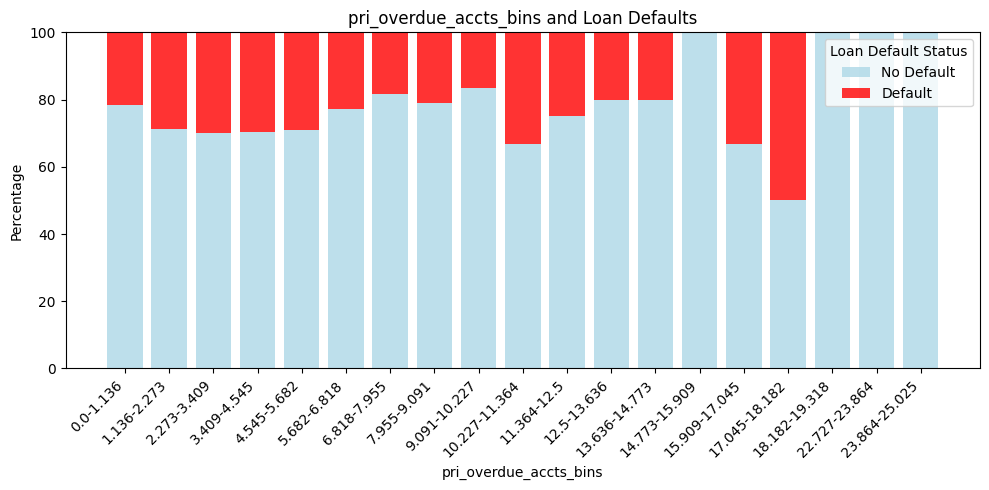

Number of unique values in pri_current_balance: 71341
Number of bins: 30


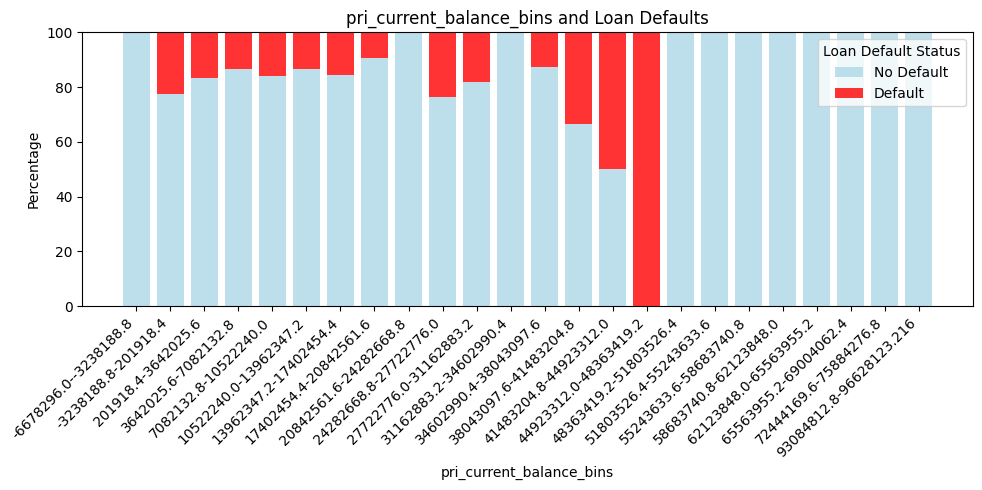

Number of unique values in pri_sanctioned_amount: 44390
Number of bins: 30


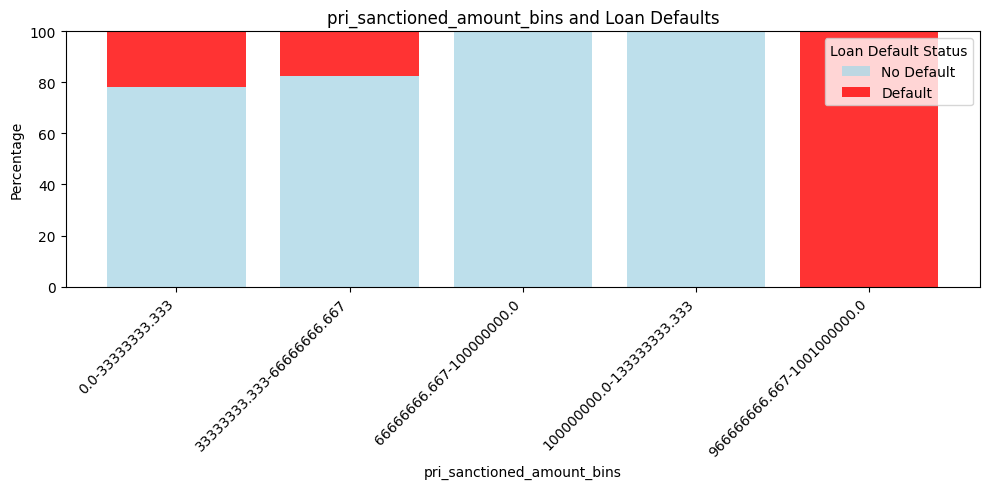

Number of unique values in pri_disbursed_amount: 47909
Number of bins: 30


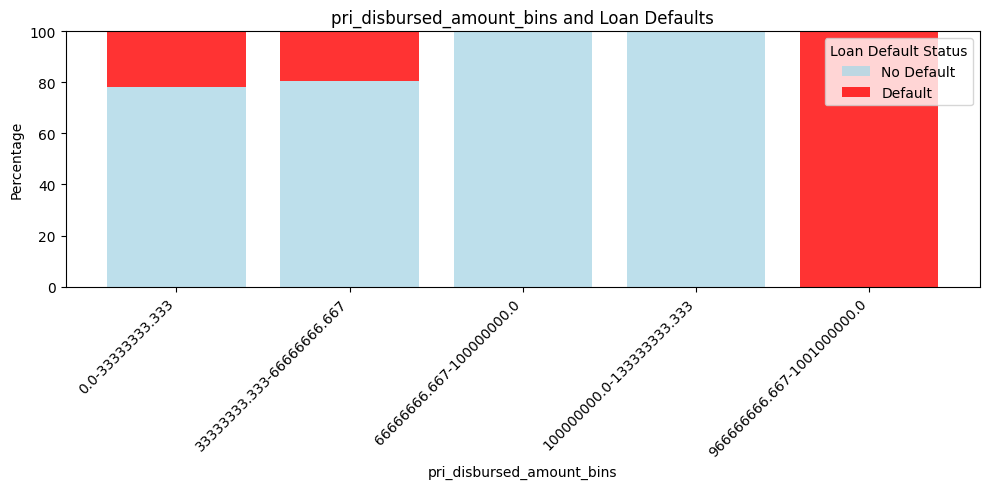

Number of unique values in sec_no_of_accts: 37
Number of bins: 30


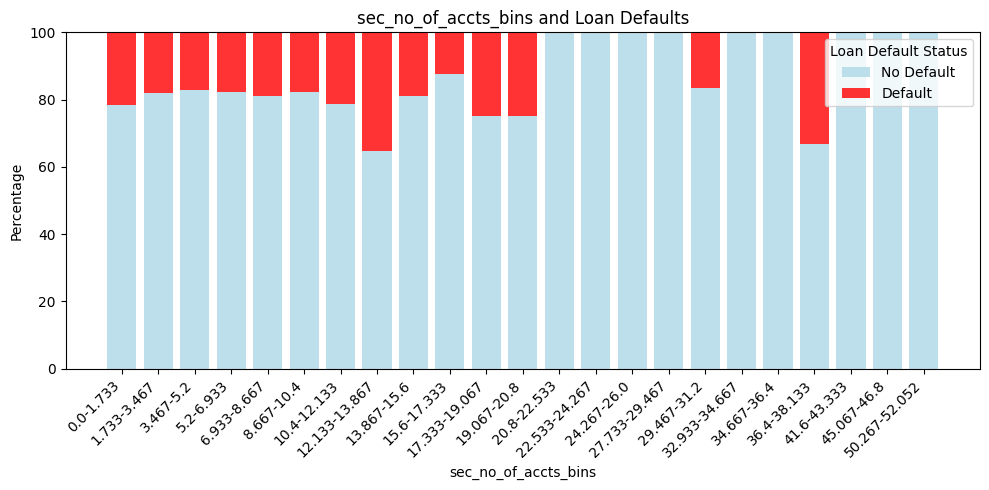

Number of unique values in sec_active_accts: 23
Number of bins: 23


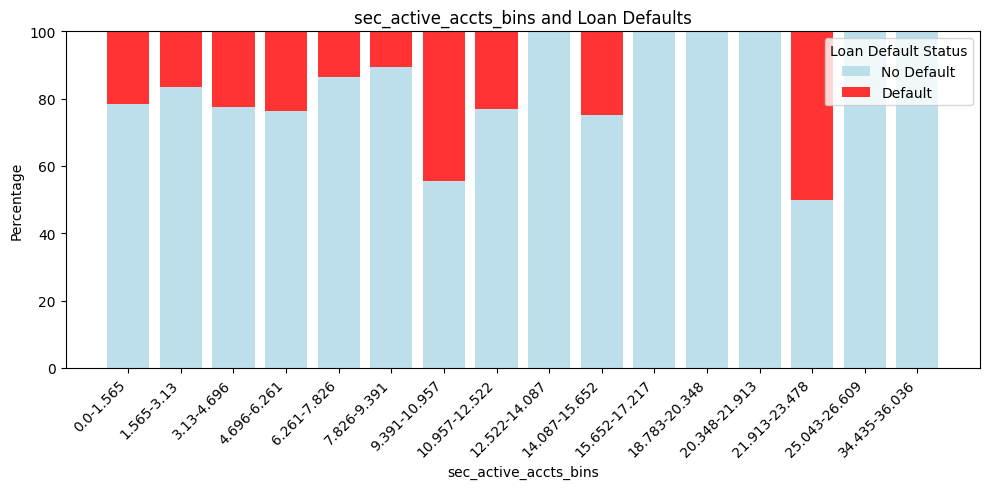

Number of unique values in sec_overdue_accts: 9
Number of bins: 9


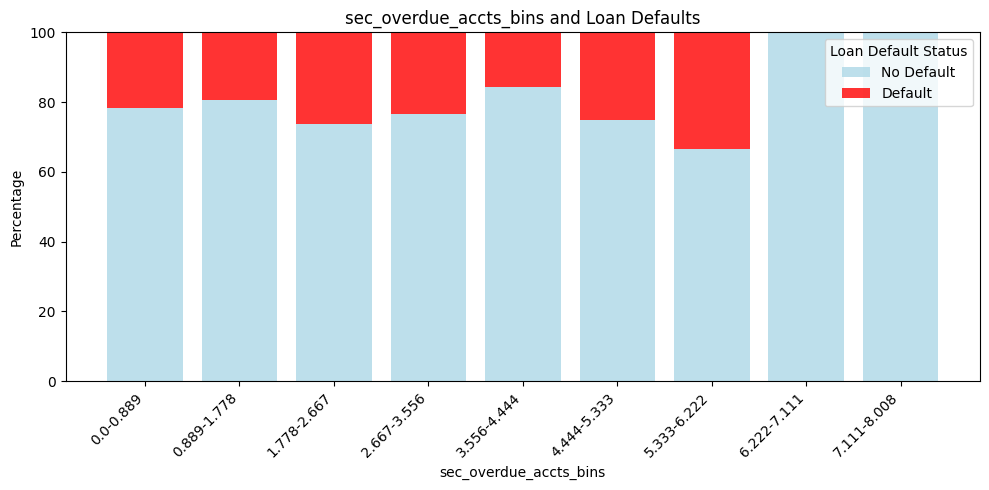

Number of unique values in sec_current_balance: 3246
Number of bins: 30


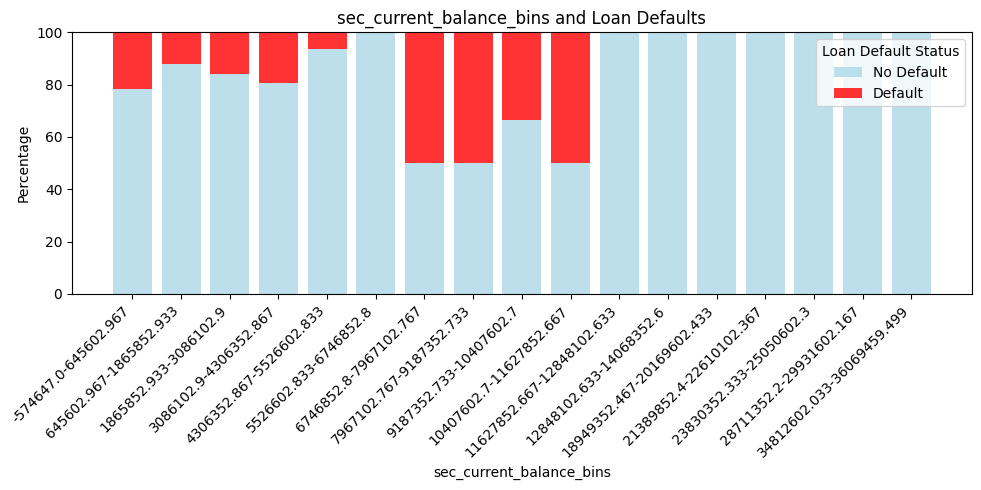

Number of unique values in sec_sanctioned_amount: 2223
Number of bins: 30


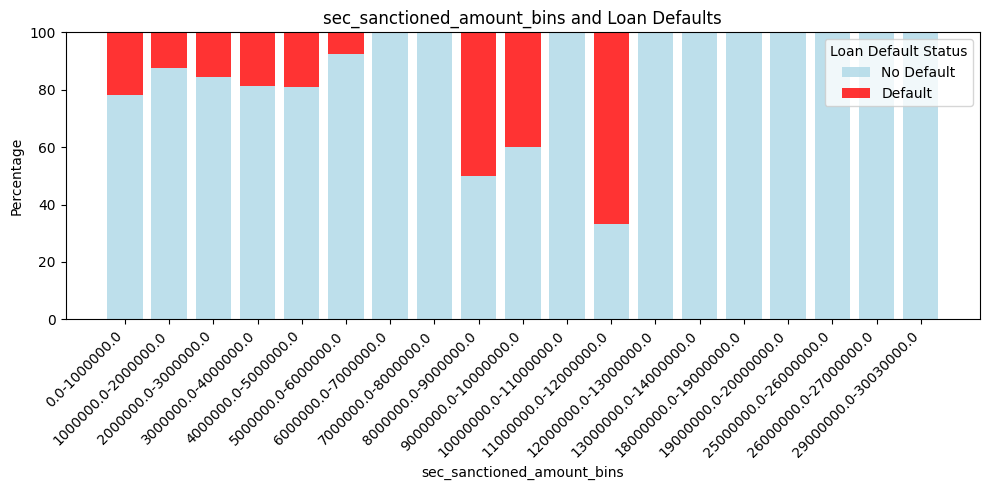

Number of unique values in sec_disbursed_amount: 2553
Number of bins: 30


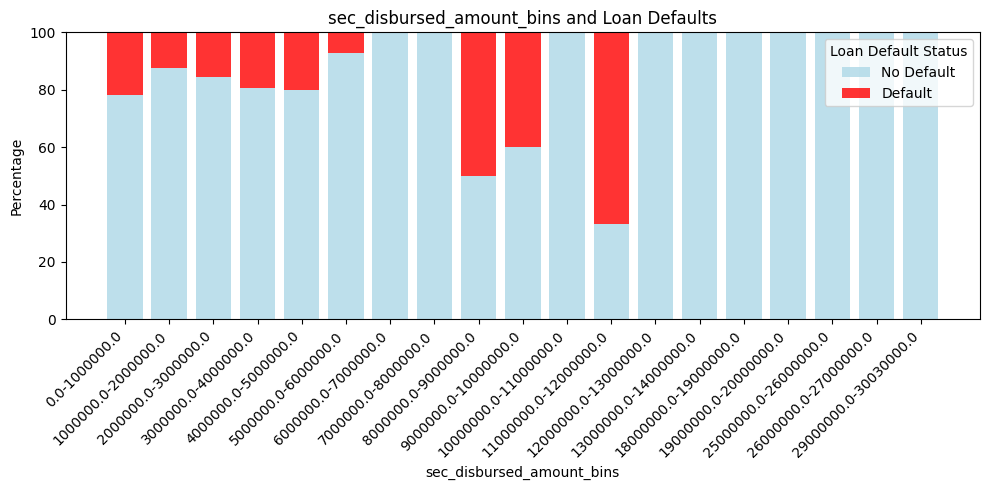

Number of unique values in primary_instal_amt: 28067
Number of bins: 30


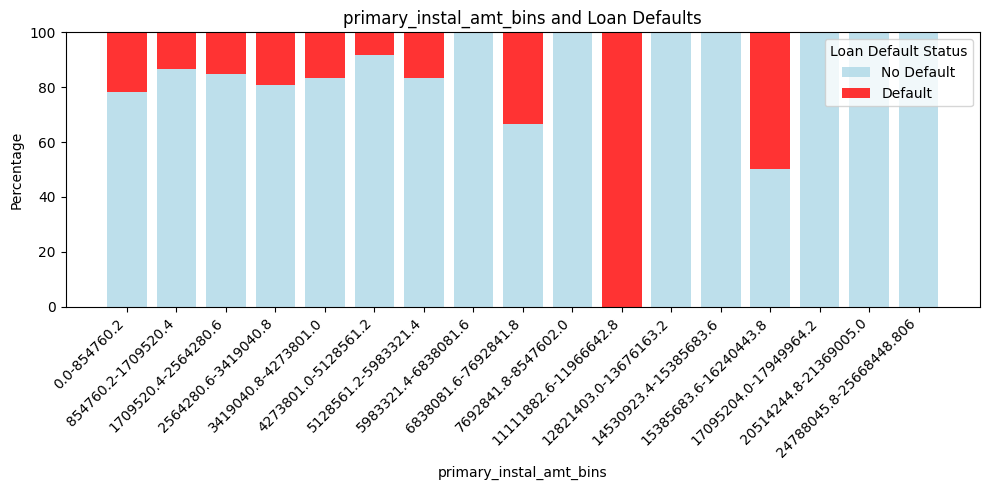

Number of unique values in sec_instal_amt: 1918
Number of bins: 30


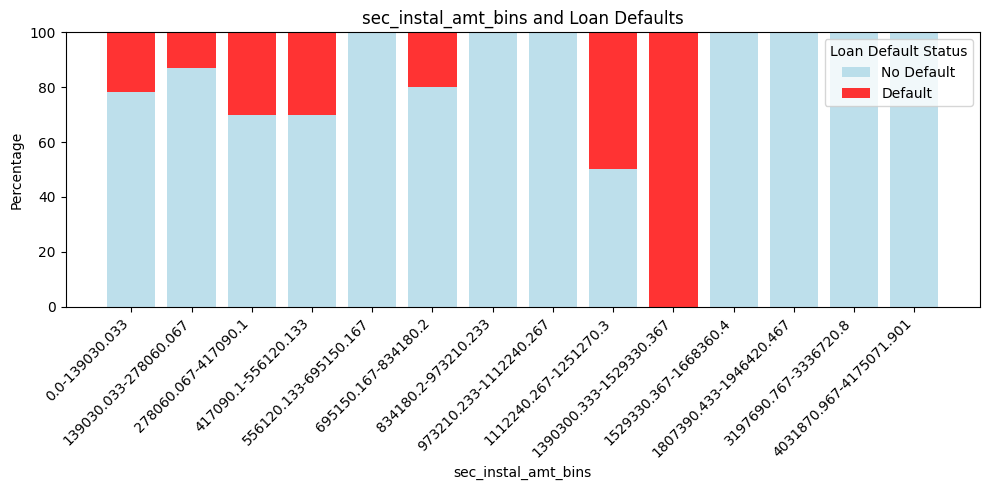

Number of unique values in new_accts_in_last_six_months: 26
Number of bins: 26


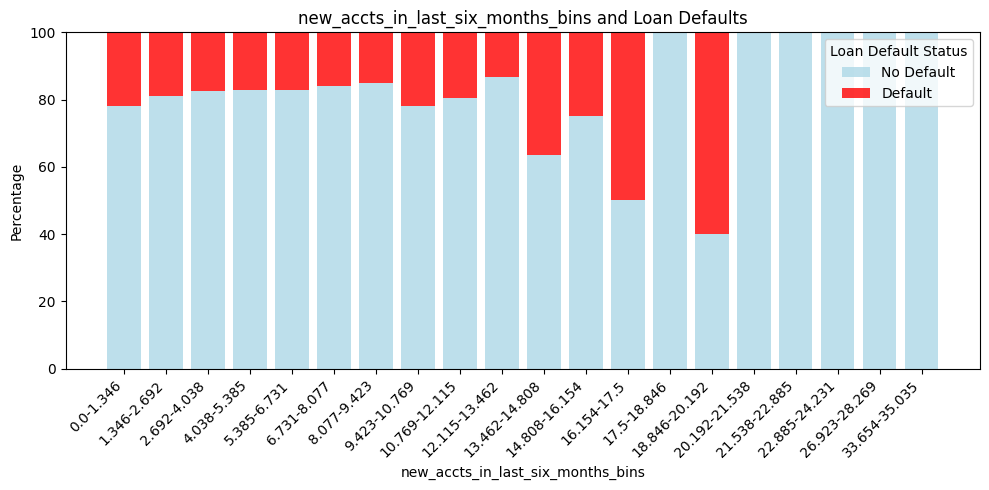

Number of unique values in delinquent_accts_in_last_six_months: 14
Number of bins: 14


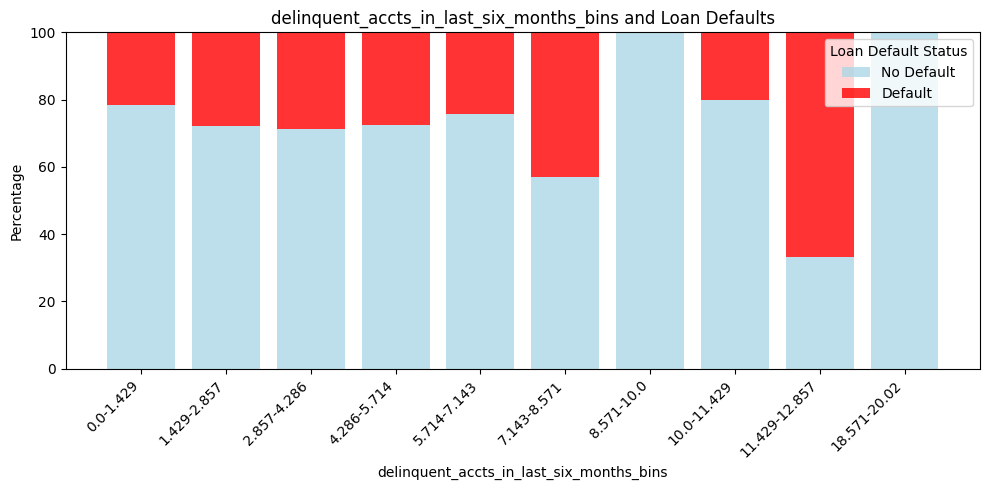

Number of unique values in no_of_inquiries: 25
Number of bins: 25


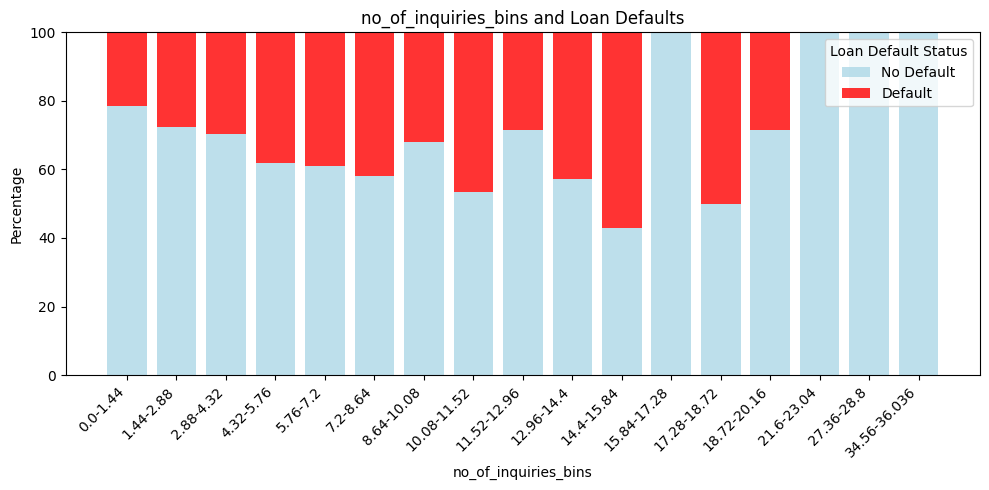

Number of unique values in loan_default: 2
Number of bins: 2


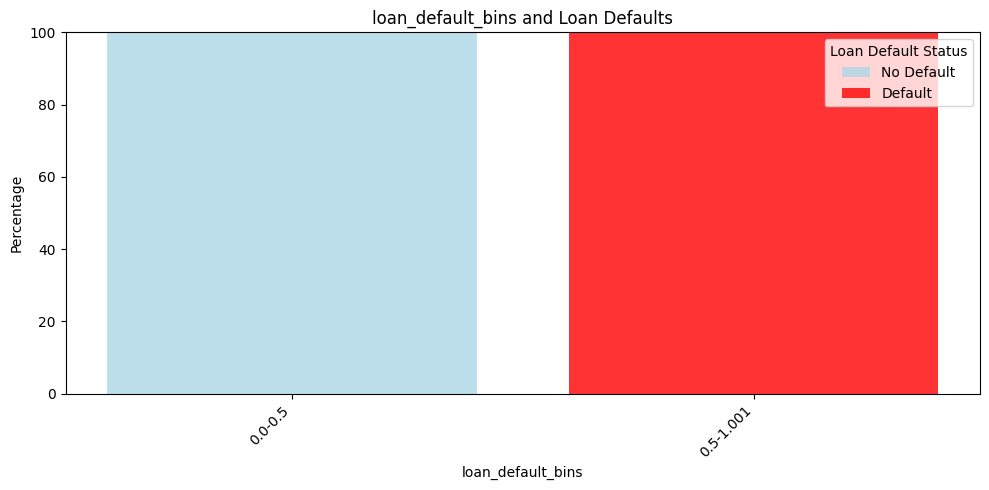

Number of unique values in avg_acct_age: 192
Number of bins: 30


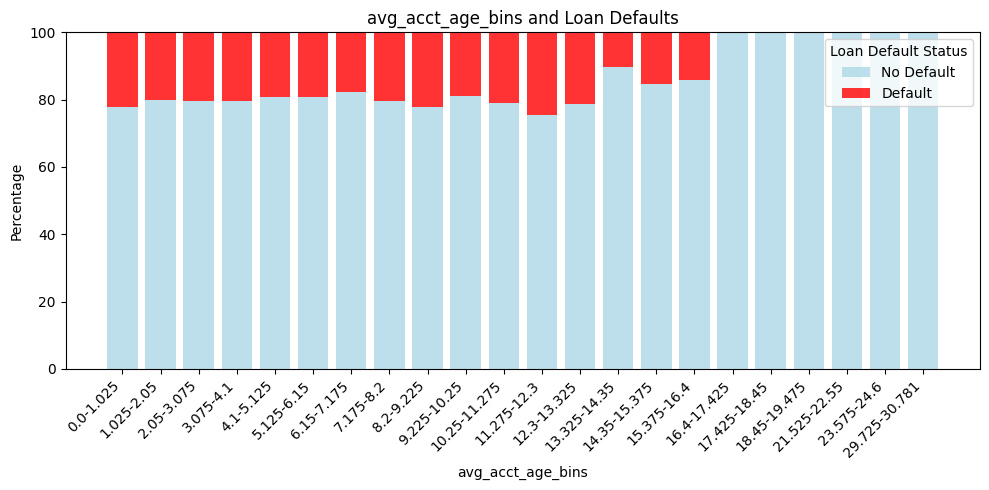

Number of unique values in credit_hist_leng: 294
Number of bins: 30


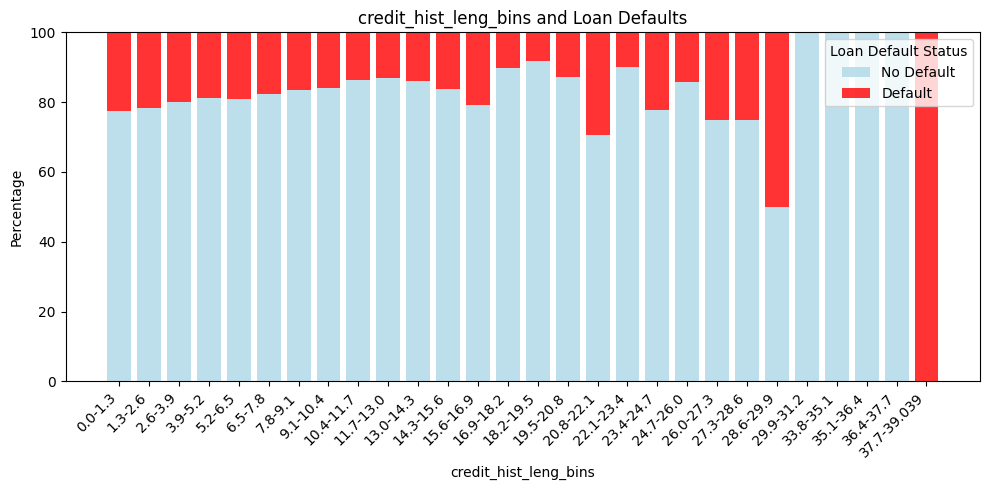

Number of unique values in customer_age: 47
Number of bins: 30


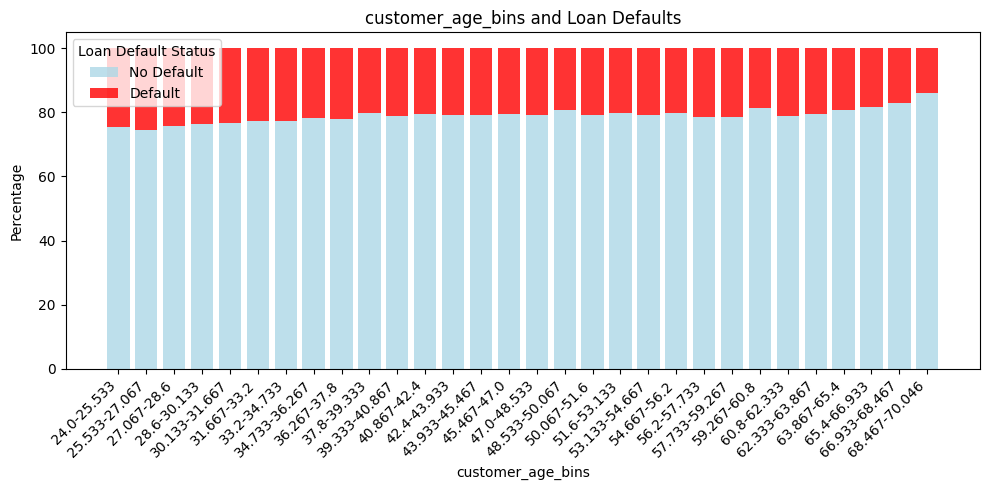

In [185]:
numeric_features = loan.select_dtypes(include=['int64', 'float64']).columns
numeric_features

for col in numeric_features:
  profile_numeric(col)

In [186]:
# Drop unnecessary columns
loan.drop(columns=['average_acct_age', 'credit_history_length', 'date_of_birth'], inplace=True)


In [187]:


# Define feature matrix and target vector
X = loan.drop(columns=['uniqueid', 'loan_default'], axis=1)
y = loan['loan_default']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include=['object']).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs = -1, random_state=42))])

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Evaluate the model
print("Training Classification Report:\n", classification_report(y_train, y_pred_train))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))



Training Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    109499
           1       1.00      0.00      0.00     30393

    accuracy                           0.78    139892
   macro avg       0.89      0.50      0.44    139892
weighted avg       0.83      0.78      0.69    139892

Test Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     73044
           1       0.67      0.00      0.00     20218

    accuracy                           0.78     93262
   macro avg       0.72      0.50      0.44     93262
weighted avg       0.76      0.78      0.69     93262



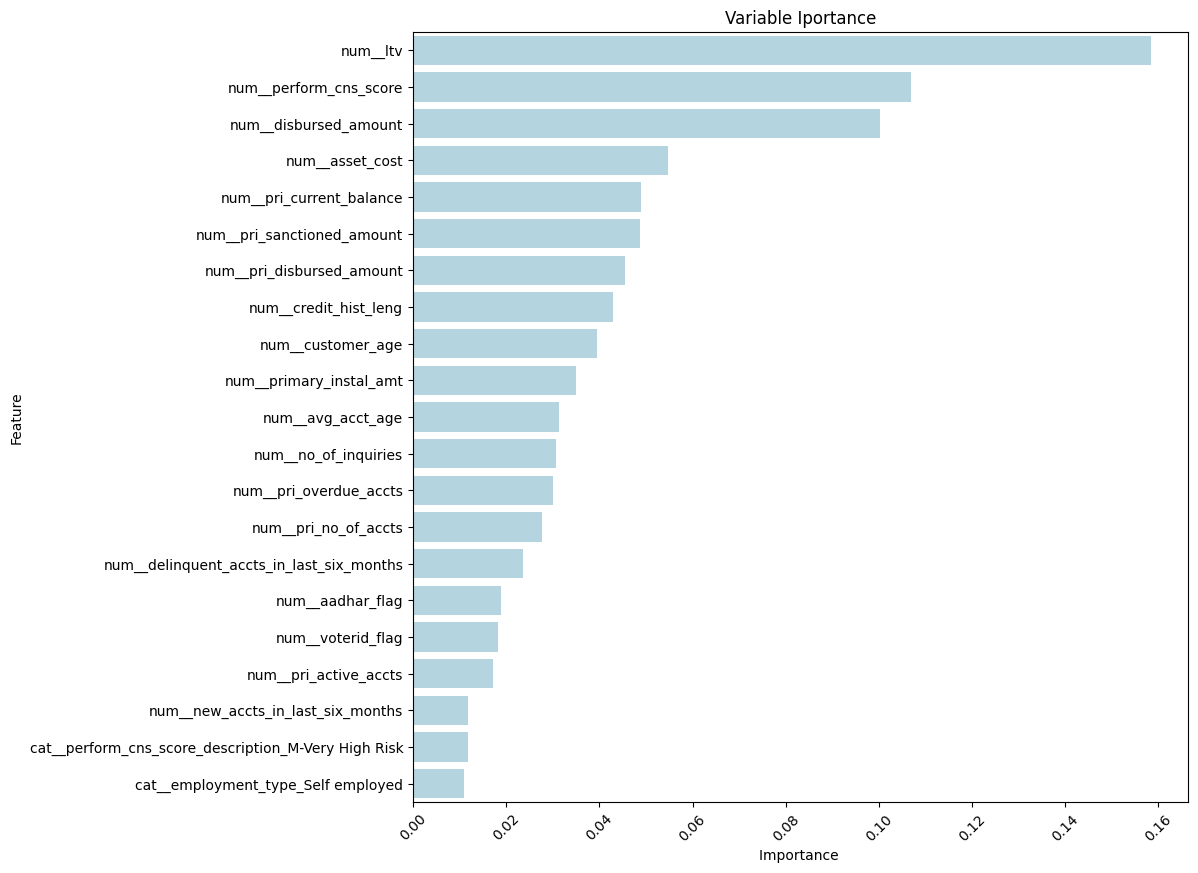

In [188]:
# -- get feature importance
importance = clf['classifier'].feature_importances_
feature_names = clf['preprocessor'].get_feature_names_out()
# -- summarize feature importance into a dictionary
feature_imp ={}
for i,v in enumerate(importance):
    items = feature_names[i].split('_')
    if items[0].isdigit():
        fname = categorical_features[int(items[0])] + "_" + items[1]
        feature_imp[fname] = v
    else:
        feature_imp[feature_names[i]] = v
        #print(items[0].isdigit())
        #print(items)
    #if int(items[0]) >= 0:
    #print(categorical_features[int(items[0])])

# make the dictionary a data frame
feature_imp = pd.DataFrame.from_dict(feature_imp, orient='index',
                                     columns=['importance'])

# -- prep and filter our dataframe, only need to look at the important features i.e. things > 0
feature_imp = (feature_imp
               .reset_index()
               .rename(columns={'index':'feature'})
               .sort_values('importance',ascending=False)
               .query('importance > 0.01'))

# -- plot that
plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="feature", data=feature_imp, color="lightblue")
plt.title('Variable Iportance')
plt.ylabel('Feature')
plt.xlabel('Importance ')
plt.xticks(rotation=45)
plt.show()

--- Random Forest ---
Train AUC Score        : 0.692416
Test AUC Score         : 0.635459

--- TEST score thresholds ---
    fpr   tpr  threshold
0  0.01  0.02       0.38
1  0.02  0.04       0.35
2  0.03  0.06       0.33
3  0.04  0.08       0.32
4  0.05  0.10       0.31




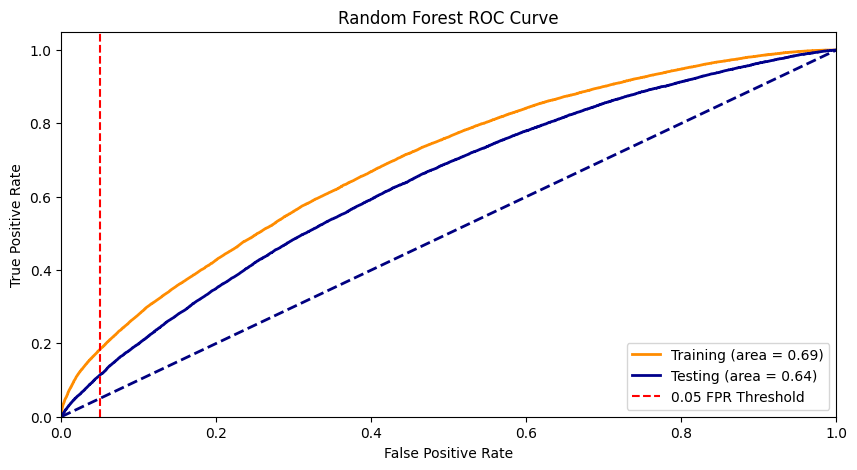

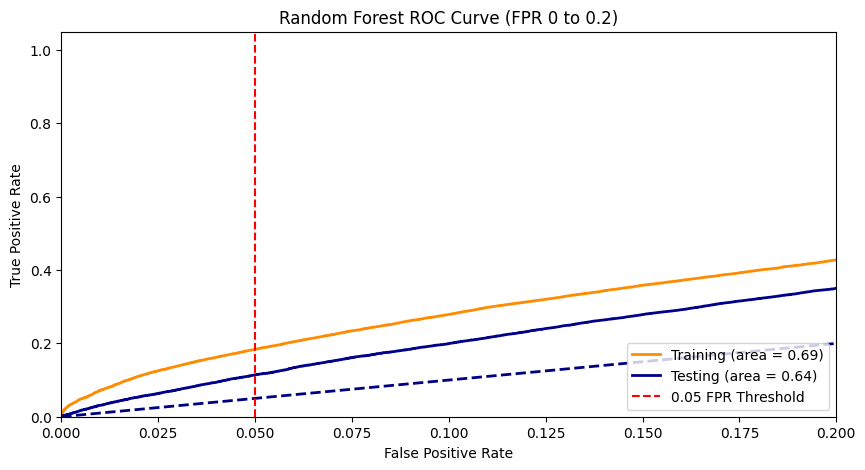

In [189]:
def model_auc_roc(model, model_name, X_train, y_train, X_test, y_test):
    # 1. Predict on train and test
    train_predict_proba = model.predict_proba(X_train)[:, 1]
    test_predict_proba = model.predict_proba(X_test)[:, 1]

    # 2. Get FPR, TPR, and thresholds for train and test
    train_fpr, train_tpr, train_thr = roc_curve(y_train, train_predict_proba)
    test_fpr, test_tpr, test_thr = roc_curve(y_test, test_predict_proba)

    # 3. Calculate AUC for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)

    # 4. Print performance
    print(f"--- {model_name} ---")
    print(f"Train AUC Score        : {train_auc:.6f}")
    print(f"Test AUC Score         : {test_auc:.6f}\n")

    # 5. FPR from 1 - 5%
    model_stat = pd.DataFrame({
        'fpr': test_fpr,
        'tpr': test_tpr,
        'threshold': test_thr
    }).round(decimals=2)

    # Get maximum threshold for each FPR group
    m = model_stat.loc[model_stat.groupby('fpr')['threshold'].idxmax()]

    print("--- TEST score thresholds ---")
    print(m[(m['fpr'] > 0.0) & (m['fpr'] <= 0.05)].reset_index(drop=True))
    print("\n")

    # 6. Plot ROC Curve for the entire range
    plt.figure(figsize=(10, 5))
    plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'Training (area = {train_auc:.2f})')
    plt.plot(test_fpr, test_tpr, color='darkblue', lw=2, label=f'Testing (area = {test_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axvline(x=0.05, color='r', linestyle='--', label='0.05 FPR Threshold')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # 7. Plot ROC Curve focusing on 0 to 0.2 FPR range
    plt.figure(figsize=(10, 5))
    plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label=f'Training (area = {train_auc:.2f})')
    plt.plot(test_fpr, test_tpr, color='darkblue', lw=2, label=f'Testing (area = {test_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axvline(x=0.05, color='r', linestyle='--', label='0.05 FPR Threshold')
    plt.xlim([0.0, 0.2])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve (FPR 0 to 0.2)')
    plt.legend(loc="lower right")
    plt.show()



model_auc_roc(clf, "Random Forest", X_train, y_train, X_test, y_test)


## Explore Predictions

In [190]:
X_test['proba_default'] = clf.predict_proba(X_test)[:, 1]
X_test['pred_default'] = clf.predict(X_test)
X_test['loan_default'] = y_test
top_10_tp = X_test[y_test ==1].nlargest(10, 'proba_default')
top_10_tp

,disbursed_amount,asset_cost,ltv,employment_type,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,...,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,avg_acct_age,credit_hist_leng,birth_year,customer_age,proba_default,pred_default,loan_default
112756,54259,62940,88.97,Self employed,1,1,1,0,0,0,...,4,2,3,0.083333,0.166667,1982,42.0,0.554990,1,1
106878,52303,59262,89.43,Salaried,1,1,0,0,0,0,...,3,1,9,0.083333,0.416667,1996,28.0,0.516534,1,1
161963,64382,70218,93.99,Salaried,1,1,0,0,0,0,...,3,1,1,0.083333,0.166667,1996,28.0,0.511073,1,1
195735,58084,69495,85.00,Self employed,1,0,0,1,0,0,...,3,1,1,0.166667,0.416667,1989,35.0,0.501440,1,1
107935,53500,60699,89.95,Self employed,1,0,0,1,0,0,...,1,1,0,0.083333,0.083333,1989,35.0,0.499522,0,1
198885,54990,66638,86.89,Self employed,1,1,1,0,0,0,...,2,1,1,0.250000,0.416667,1983,41.0,0.498545,0,1
170810,55513,67270,84.88,Salaried,1,1,0,0,0,0,...,1,1,2,0.416667,0.416667,1972,52.0,0.494593,0,1
196672,69183,97167,74.10,Self employed,1,1,0,0,0,0,...,2,1,1,0.166667,0.250000,1995,29.0,0.493298,0,1
46864,54663,69490,80.08,Salaried,1,1,0,0,0,0,...,1,1,0,0.083333,0.083333,1994,30.0,0.493268,0,1
60613,55659,67642,84.27,Self employed,1,1,0,0,0,0,...,2,1,2,0.000000,0.000000,1966,58.0,0.486871,0,1
